<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/dataset/data_no1.csv')
#df = df.drop(['time', 'tempk', 'forecasttime'], axis=1)
print(df.head(10))
print(df.describe(include='all'))


             timestamp  consumption  ...  forecasttotalpulse  homesforecastedpulse
0  2018-08-13 01:00:00     1.167373  ...                 NaN                   NaN
1  2018-08-13 02:00:00     1.171019  ...                 NaN                   NaN
2  2018-08-13 03:00:00     1.102508  ...                 NaN                   NaN
3  2018-08-13 04:00:00     1.281203  ...                 NaN                   NaN
4  2018-08-13 05:00:00     1.562144  ...                 NaN                   NaN
5  2018-08-13 06:00:00     1.401059  ...                 NaN                   NaN
6  2018-08-13 07:00:00     1.229084  ...                 NaN                   NaN
7  2018-08-13 08:00:00     1.124097  ...                 NaN                   NaN
8  2018-08-13 09:00:00     1.095233  ...                 NaN                   NaN
9  2018-08-13 10:00:00     1.076520  ...                 NaN                   NaN

[10 rows x 22 columns]
                  timestamp  ...  homesforecastedpulse
count   

In [6]:
ActualLoad = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 2])
ForecastedLoad= (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 11])
tempC = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 4])



In [7]:
print(ActualLoad, ForecastedLoad, tempC)

timestamp
2018-08-13 01:00:00      3190.430
2018-08-13 02:00:00      3200.395
2018-08-13 03:00:00      3013.154
2018-08-13 04:00:00      3501.527
2018-08-13 05:00:00      4269.340
                          ...    
2021-01-28 18:00:00    180122.345
2021-01-28 19:00:00    180508.608
2021-01-28 20:00:00    177324.554
2021-01-28 21:00:00    171417.187
2021-01-28 22:00:00    163884.793
Name: consumptiontotal, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00      3500.891000
2018-08-13 02:00:00      3478.847000
2018-08-13 03:00:00      3408.319000
2018-08-13 04:00:00      3582.040000
2018-08-13 05:00:00      3897.122000
                           ...      
2021-01-28 18:00:00    177088.697967
2021-01-28 19:00:00    175249.211420
2021-01-28 20:00:00    171623.854528
2021-01-28 21:00:00    165562.169058
2021-01-28 22:00:00    157030.999172
Name: forecasttotal, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00     7.182149
2018-08-13 02:00:00     6.393077
2018-08-13 03:00:0

In [8]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]


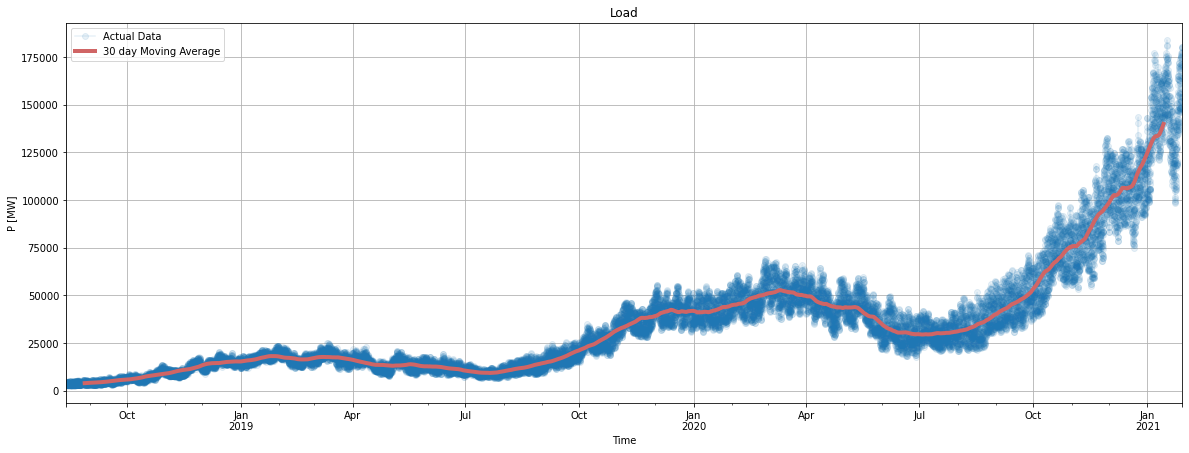

In [24]:
ActualLoad.plot(figsize=[20,7], alpha=0.1, marker="o")
#ForecastedLoad.plot(figsize=[20,7], alpha=0.1, marker=".")
ActualLoad.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
#ForecastedLoad.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=green, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("P [MW]");
plt.title("Load");